# Apprentissage supervisé - Classification

## 1 - Préparation des données

### 1.1 - Téléchargement de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml(name="mnist_784", version=1)

### 1.2 - Information sur les données

In [3]:
# Afficher les clés du dictionnaire
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
#Séparer les features et la target
X, y = mnist['data'], mnist['target']
# Afficher le nombre de features
print('Shape de X:', X.shape)
# Afficher le nombre de labels
print('Shape de y:', y.shape)
# Afficher les différentes classes
print('Différentes classes:',np.unique(y))



Shape de X: (70000, 784)
Shape de y: (70000,)
Différentes classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [5]:
# Afficher une déscription de la base de données
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

'5'

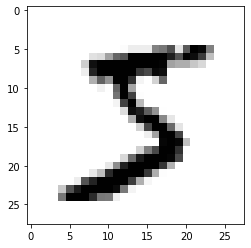

In [6]:
# Afficher la première image 
digit = X[0].reshape(28, 28)
plt.imshow(digit, cmap=plt.cm.gray_r)

#  Afficher la classe de cette instance
y[0]

In [7]:
# Afficher le type des classes
type(y[0])

str

In [8]:
# Changer le type pour passer de str à int
y = y.astype(np.uint8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### 1.3 - Répartition des données

In [9]:
# Separer le dataset en train et test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 2 -  Apprentissage d’un classifieur binaire

### 2.1 - Apprentissage des données

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [11]:
# Créer les matrices booléennes en fonction de 5 
bool_5_test = y_test == 5
bool_5_train = y_train == 5

In [12]:
# Créer le modèle
model = SGDClassifier().fit(X_train, bool_5_train)

In [13]:
# Afficher le score du modèle
model.score(X_test, bool_5_test)

0.9549

### 2.2 - Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 2.2.1 - Taux de classification

In [14]:
# Création de plusieurs modèles avec cross_val_score
scores = cross_val_score(model, X_test, bool_5_test, cv=3, scoring='accuracy')
print('Scores des modèles: ', scores)
print('Score moyen des modèles: ', scores.mean())

Scores des modèles:  [0.95260948 0.95979598 0.96129613]
Score moyen des modèles:  0.9579005291051


In [15]:
from sklearn.base import BaseEstimator

# Créer la class Never5Classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [16]:
# Créer une instance
classifier = Never5Classifier()
# Afficher le score de chaque modèle
scores = cross_val_score(classifier, X_test, bool_5_test, cv=3, scoring='accuracy')
print('Scores des modèles: ', scores)
print('Score moyen des modèles: ', scores.mean())

Scores des modèles:  [0.90791842 0.91029103 0.91419142]
Score moyen des modèles:  0.9108002881871871


#### 2.2.2 - Matrice de confusion:

In [17]:
# Prédire les valeurs
y_pred = cross_val_predict(model, X_test, bool_5_test, cv=3)
y_pred

array([False,  True, False, ..., False,  True, False])

In [18]:
from sklearn.metrics import confusion_matrix

# Afficher la matrice de confusion
vn, fp, fn, vp = confusion_matrix(bool_5_test, y_pred).ravel()
print("Vrais positifs: ", vp)
print("Vrais négatifs: ", vn)
print("Faux positifs: ", fp)
print("Faux négatifs: ", fp)

Vrais positifs:  729
Vrais négatifs:  8731
Faux positifs:  377
Faux négatifs:  377


#### 2.2.3 - Précision et rappel:

In [19]:
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, roc_curve, roc_auc_score

In [20]:
print("F1 score: {0:0.2f}".format(f1_score(bool_5_test, y_pred)))
print("Precision score: {0:0.2f}".format(precision_score(bool_5_test, y_pred)))
print("Recall score: {0:0.2f}".format(recall_score(bool_5_test, y_pred)))

F1 score: 0.73
Precision score: 0.66
Recall score: 0.82


In [21]:
y_pred = cross_val_predict(model, X_test, bool_5_test, cv=3, method="decision_function")

In [22]:
precision, recall, thresholds = precision_recall_curve(bool_5_test, y_pred)

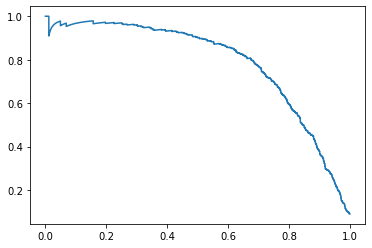

In [23]:
plt.plot(recall, precision)

Nous pouvons observer que la précision chute énormément après que le rappel dépasse les 0.6

#### 2.2.4 Courbe ROC:

In [24]:
fp, tp, thresholds = roc_curve(bool_5_test, y_pred)

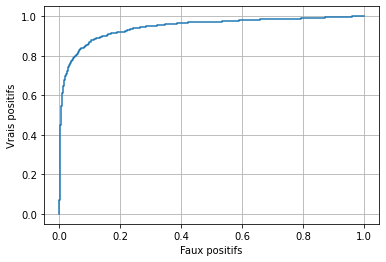

In [25]:
# Afficher la courbe
plt.plot(fp, tp)
plt.xlabel("Faux positifs")
plt.ylabel("Vrais positifs")
plt.grid()

In [26]:
# Calculer l'air sous la courbe
print("ROC : {0:0.3f}".format(roc_auc_score(bool_5_test, y_pred)))

ROC : 0.945


## 3 - Apprentissage d’un classifieur multi-classes

### 3.1 - Apprentissage des données

In [27]:
# Créer un modèle capable de prédire les chiffres sur chaque image
model_multi = SGDClassifier().fit(X_train, y_train)

In [28]:
# Afficher la prédiction de la première image
model_multi.predict([X_train[0]])

array([5], dtype=uint8)

In [29]:
# Afficher la fonction de décision de la première image
model_multi.decision_function(X_train)[0]

array([-12224.05434234, -34089.0141222 ,  -9294.87164925,  -2016.94816006,
       -19957.10491911,   2436.55304374, -18525.97050305, -17991.93991246,
        -7636.51440472, -10557.75074963])

In [30]:
# Afficher les différentes classes
model_multi.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 3.2 - Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 - Taux de classification

In [31]:
# Effectuer une validation croisée du modèle
cross_val_score(model_multi, X_train, y_train, cv=3, scoring='accuracy')

array([0.8578 , 0.8776 , 0.87025])

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Utiliser StandardScaler pour normaliser les features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [ ]:
# Effectuer une validation croisée du modèle avec les valeurs normalisées
cross_val_score(model_multi, X_train_scale, y_train, cv=3, scoring='accuracy')

Nous pouvons affirmer que le Scaling améliore les performances du modèle

#### 3.2.2 -  Matrice de Confusion

In [37]:
# Effecture une prédiction avec les valeurs normalisées
pred_multi = model_multi.predict(X_test_scale)

Text(0.5, 1.0, 'Matrice de confusion')

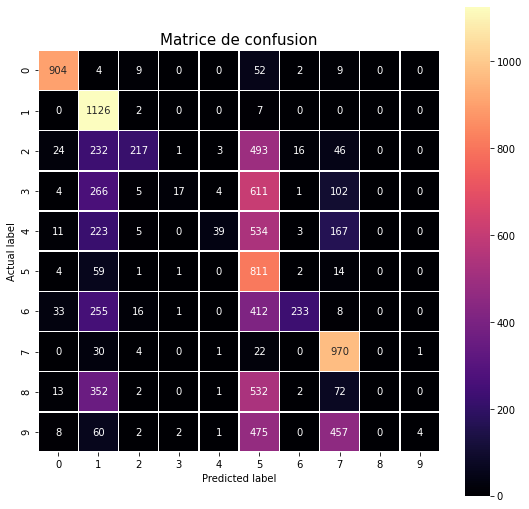

In [67]:
# Afficher la matrice de confusion de cette prédiction
cm = confusion_matrix(y_test, pred_multi)

import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'magma');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)